# Survey - US Stock and Bond Returns

#### Summarize the basic statistics of annual returns from the last 230+ years

Questions to Answer

1) What is the distribution of annual returns?
2) What are the chances that an investor will receive the 'average' return for stocks?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
from pathlib import Path
import scipy.stats as st
from matplotlib.lines import Line2D
import dataframe_image as dfi
import matplotlib.patches as mpatches

In [2]:
# Display and Warnings
from IPython.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initial cleaning/wrangling performed in excel
# open csv file with prepped mcquarrie data
stock_bond_data = pd.read_csv('Data/mcquarrie_real_stock_bond_returns_prepped_csv.csv')

# see the columns and rows as necessary
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

stock_bond_data.tail(5)

,To January of:,Measuring Worth inflation index (annual),MW 2 yr smoothed,CPI-U January values fr 1913,annual_inflation_relative,nominal_stock_return,real_stock_return,nominal_bond_return,real_bond_return,real_stock_index,real_bond_index,rolling_ten_stocks,rolling_ten_bonds,rolling_thirty_stocks,rolling_thirty_bonds,rolling_fifty_stocks,rolling_fifty_bonds,rolling_hundred_stocks,rolling_hundred_bonds
228,2020,NaN,NaN,257.971,1.024866,0.203147,0.173956,0.236626,0.206623,683640.8515,11295.425840,0.107716,0.066863,0.074291,0.057738,0.062983,0.046144,0.071688,0.032266
229,2021,NaN,NaN,261.582,1.013998,0.206963,0.190301,0.060319,0.045682,813738.5927,11811.425050,0.104459,0.064001,0.080445,0.057732,0.065074,0.044109,0.075042,0.032096
230,2022,NaN,NaN,281.148,1.074799,0.184505,0.102072,-0.039668,-0.106500,896798.4467,10553.504450,0.115901,0.033784,0.076201,0.049444,0.065115,0.041171,0.073874,0.028167
231,2023,NaN,NaN,299.170,1.064101,-0.083861,-0.139050,-0.155561,-0.206430,772098.9798,8374.946531,0.085048,0.006672,0.068402,0.037926,0.060482,0.035834,0.069452,0.024928
232,2024,NaN,NaN,309.060,1.033058,0.192117,0.153969,0.024268,-0.008508,890978.3540,8303.688695,0.082454,0.008292,0.069830,0.034377,0.069178,0.037293,0.070730,0.024746


In [9]:
# Create dataframe with just the nominal return data
nominal_df = stock_bond_data[['To January of:', 'annual_inflation_relative', 'nominal_stock_return',
       'nominal_bond_return']]
nominal_df.columns = ['year_to_jan', 'inflation', 'nominal_stock_return',
       'nominal_bond_return']

nominal_df.tail(2)

,year_to_jan,inflation,nominal_stock_return,nominal_bond_return
231,2023,1.064101,-0.083861,-0.155561
232,2024,1.033058,0.192117,0.024268


In [11]:
# Convert float columns to percent
nominal_df['inflation_perc'] = (nominal_df['inflation'] - 1) * 100
nominal_df['nom_stock_perc'] = nominal_df['nominal_stock_return'] * 100
nominal_df['nom_bond_perc'] = nominal_df['nominal_bond_return'] * 100

nominal_df.sample(3)

,year_to_jan,inflation,nominal_stock_return,nominal_bond_return,inflation_perc,nom_stock_perc,nom_bond_perc
131,1923,0.994083,0.292939,0.081515,-0.591716,29.293893,8.151453
56,1848,1.015595,0.053085,0.032959,1.559454,5.308479,3.295929
83,1875,0.957597,0.039913,0.101433,-4.240283,3.991286,10.143341


## Annual Return Distribution

### Inflation

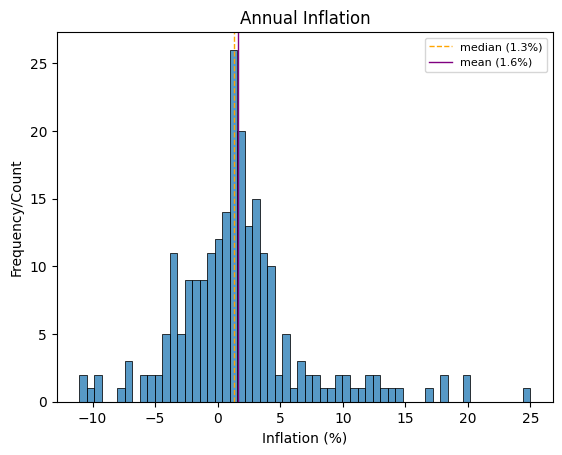

In [43]:
# Histogram for Inflation
iplot = sns.histplot(data=nominal_df, x="inflation_perc", bins=60)
iplot.set(xlabel = "Inflation (%)", title = "Annual Inflation", ylabel = "Frequency/Count") 

i_median = nominal_df['inflation_perc'].median() 
i_mean = nominal_df['inflation_perc'].mean() 

# Plot Median
plt.axvline(i_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(i_median, 1)) + "%)")
plt.axvline(i_mean, color='purple', linewidth=1, label="mean (" + str(round(i_mean, 1)) + "%)")
plt.legend(loc="upper right", fontsize=8)

### Stocks

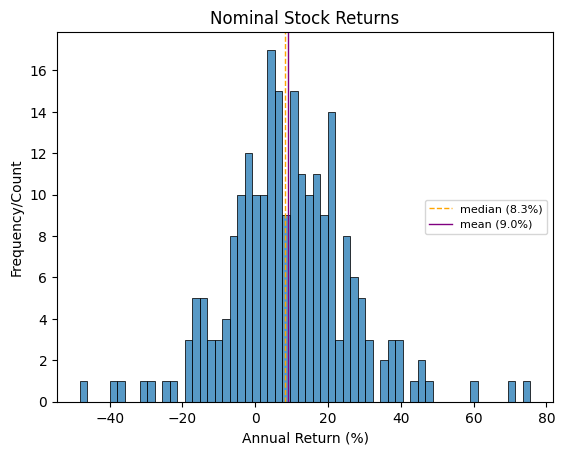

In [44]:
# Create a Histogram for Stocks Returns
# Histogram for Stock Returns
splot = sns.histplot(data=nominal_df, x="nom_stock_perc", bins=60)
splot.set(xlabel = "Annual Return (%)", title = "Nominal Stock Returns", ylabel = "Frequency/Count") 

s_median = nominal_df['nom_stock_perc'].median() 
s_mean= nominal_df['nom_stock_perc'].mean() 

# Plot Mean/Median
plt.axvline(s_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(s_median, 1)) + "%)")
plt.axvline(s_mean, color='purple', linewidth=1, label="mean (" + str(round(s_mean, 1)) + "%)")
plt.legend(loc="center right", fontsize=8)

### Bonds

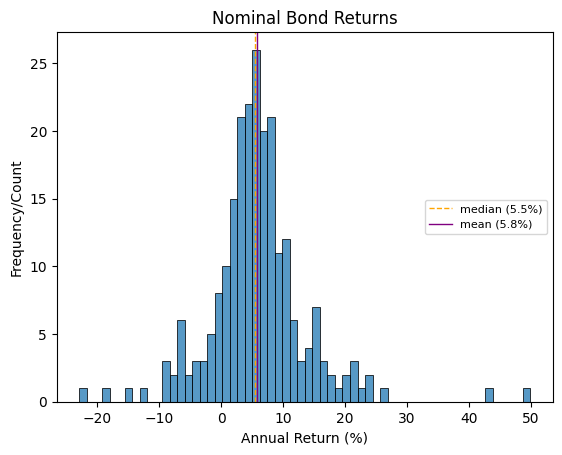

In [45]:
# Create a Histogram for Bond Returns
splot = sns.histplot(data=nominal_df, x="nom_bond_perc", bins=60)
splot.set(xlabel = "Annual Return (%)", title = "Nominal Bond Returns", ylabel = "Frequency/Count") 

b_median = nominal_df['nom_bond_perc'].median() 
b_mean= nominal_df['nom_bond_perc'].mean() 

# Plot Mean/Median
plt.axvline(b_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(b_median, 1)) + "%)")
plt.axvline(b_mean, color='purple', linewidth=1, label="mean (" + str(round(b_mean, 1)) + "%)")
plt.legend(loc="center right", fontsize=8)

In [77]:
### Multi-Distribution KDE Plots for Stock, Bonds, and Inflation

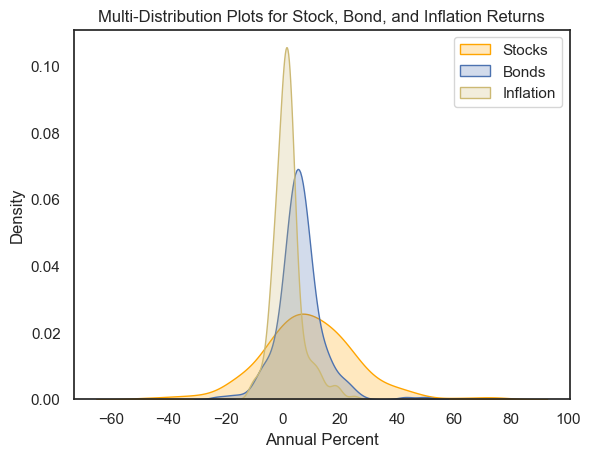

In [86]:

# style
sns.set(style="white")

# Create multiple KDE plots
features = ['nom_stock_perc', 'nom_bond_perc', 'inflation_perc']
asset_type = ["Stocks", "Bonds", "Inflation"]
colors = ['orange', 'b', 'y']

for feature, color, asset_type in zip(features, colors, asset_type):
    sns.kdeplot(nominal_df[feature], shade=True, color=color, label=asset_type)

# Add title, axis labels, and legend
plt.title('Multi-Distribution Plots for Stock, Bond, and Inflation Returns')
plt.xlabel('Annual Percent')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

## What are the chances you'll receive the 'Average' return?

#### 6-12% return?

In [69]:
# Stocks - Average return is 9%, so consider any return in the range of 6-12% as 'average'
avg_count = 0

for i in range(len(nominal_df['nom_stock_perc'])):
    if 6 <= nominal_df['nom_stock_perc'][i] <= 12:
        avg_count += 1


avg_years_percent = (avg_count/len(nominal_df['nom_stock_perc']))*100

print("Percent of Years with 'average returns': " + str(round(avg_years_percent)) + "%")
print("Historical Chance of Non_Average Returns: " + str(round(100 - avg_years_percent)) + "%")

Percent of Years with 'average returns': 14%
Historical Chance of Non_Average Returns: 86%


#### More than 20% or less than 0% returns?

In [73]:
# Calculate how many years were either less than 0% or greater than 20%
count_0_20 = 0

for i in range(len(nominal_df['nom_stock_perc'])):
    if 20 >= nominal_df['nom_stock_perc'][i] or nominal_df['nom_stock_perc'][i] <= 0:
        count_0_20 += 1


years_percent_0_20 = (count_0_20/len(nominal_df['nom_stock_perc']))*100

print("Number of years with returns between 0% and 20%: " + str(round(years_percent_0_20)) + "%")
print("Percent of Years with returns between 0% and 20%: " + str(round(years_percent_0_20)) + "%")
print("Historical Chance of returns outside 0-20%: " + str(round(100 - years_percent_0_20)) + "%")

Number of years with returns between 0% and 20%: 76%
Percent of Years with returns between 0% and 20%: 76%
Historical Chance of returns outside 0-20%: 24%


## 1942 to Present 

#### Survey of Returns 1942 forward

In [61]:
# Filter DataFrame for Rows corresponding to years 1942 to Present day 
nom_df_1942_ = nominal_df[nominal_df['year_to_jan'] >= 1942]
nom_df_1942_.head()

,year_to_jan,inflation,nominal_stock_return,nominal_bond_return,inflation_perc,nom_stock_perc,nom_bond_perc
150,1942,1.113475,-0.053279,0.035249,11.347518,-5.327921,3.524917
151,1943,1.076433,0.241723,0.051568,7.643312,24.172317,5.156775
152,1944,1.029586,0.213694,0.078291,2.958580,21.369385,7.829060
153,1945,1.022989,0.216247,0.068055,2.298851,21.624745,6.805549
154,1946,1.022472,0.449456,0.063903,2.247191,44.945618,6.390336


### Inflation

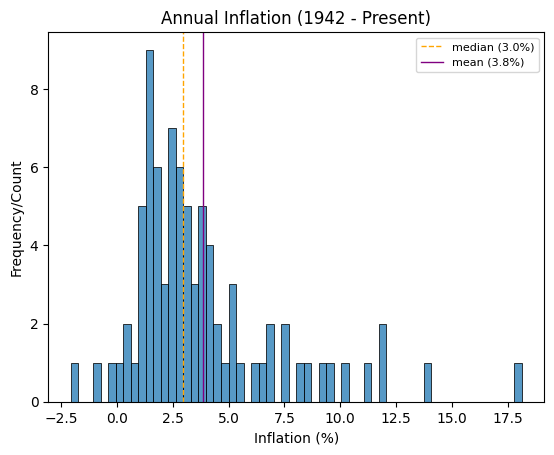

In [63]:
# Histogram for Inflation
iplot = sns.histplot(data=nom_df_1942_, x="inflation_perc", bins=60)
iplot.set(xlabel = "Inflation (%)", title = "Annual Inflation (1942 - Present)", ylabel = "Frequency/Count") 

i_median = nom_df_1942_['inflation_perc'].median() 
i_mean = nom_df_1942_['inflation_perc'].mean() 

# Plot Median
plt.axvline(i_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(i_median, 1)) + "%)")
plt.axvline(i_mean, color='purple', linewidth=1, label="mean (" + str(round(i_mean, 1)) + "%)")
plt.legend(loc="upper right", fontsize=8)

### Stocks

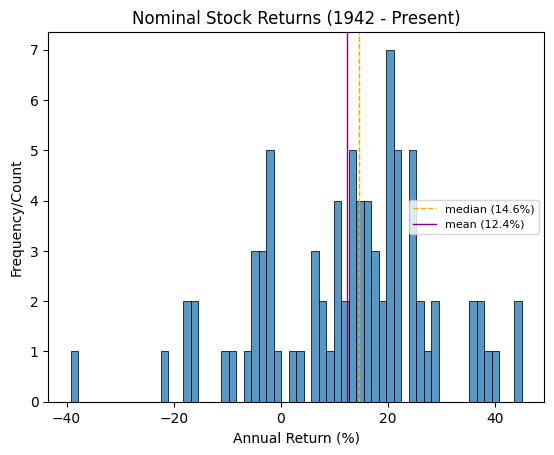

In [64]:
# Create a Histogram for Stocks Returns
splot = sns.histplot(data=nom_df_1942_, x="nom_stock_perc", bins=60)
splot.set(xlabel = "Annual Return (%)", title = "Nominal Stock Returns (1942 - Present)", ylabel = "Frequency/Count") 

s_median = nom_df_1942_['nom_stock_perc'].median() 
s_mean= nom_df_1942_['nom_stock_perc'].mean() 

# Plot Mean/Median
plt.axvline(s_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(s_median, 1)) + "%)")
plt.axvline(s_mean, color='purple', linewidth=1, label="mean (" + str(round(s_mean, 1)) + "%)")
plt.legend(loc="center right", fontsize=8)

[Text(0.5, 0, 'Annual Return (%)'),
 Text(0.5, 1.0, 'Nominal Stock Returns (1942 - Present)'),
 Text(0, 0.5, 'Frequency/Count')]

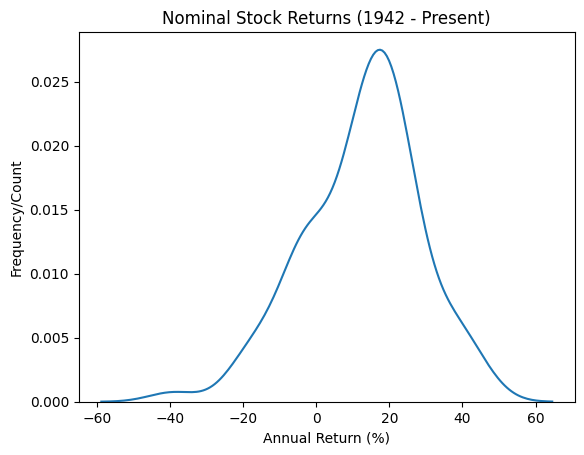

In [76]:
splot = sns.kdeplot(data=nom_df_1942_, x="nom_stock_perc")
splot.set(xlabel = "Annual Return (%)", title = "Nominal Stock Returns (1942 - Present)", ylabel = "Frequency/Count") 

### Bonds

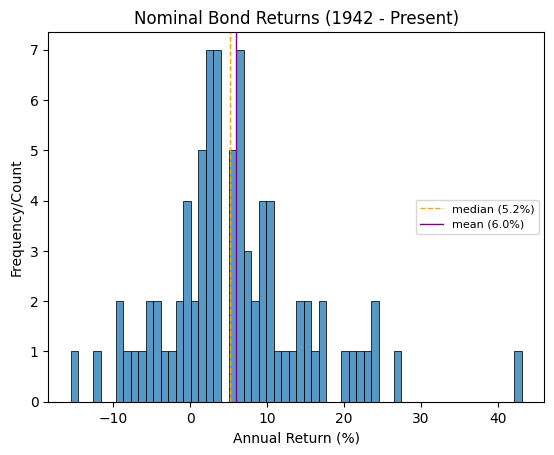

In [65]:
# Create a Histogram for Bond Returns
splot = sns.histplot(data=nom_df_1942_, x="nom_bond_perc", bins=60)
splot.set(xlabel = "Annual Return (%)", title = "Nominal Bond Returns (1942 - Present)", ylabel = "Frequency/Count") 

b_median = nom_df_1942_['nom_bond_perc'].median() 
b_mean= nom_df_1942_['nom_bond_perc'].mean() 

# Plot Mean/Median
plt.axvline(b_median, color='orange', linestyle='dashed', linewidth=1, label="median (" + str(round(b_median, 1)) + "%)")
plt.axvline(b_mean, color='purple', linewidth=1, label="mean (" + str(round(b_mean, 1)) + "%)")
plt.legend(loc="center right", fontsize=8)

## 1942 - Present: Return Chances?

### 9-15% Stock Return?

In [72]:
# Stocks - Average return is 9%, so consider any return in the range of 6-12% as 'average'
avg_count = 0
nom_df_1942_.reset_index(inplace=True)

for i in range(len(nom_df_1942_['nom_stock_perc'])):
    if 9 <= nom_df_1942_['nom_stock_perc'][i] <= 15:
        avg_count += 1


avg_years_percent = (avg_count/len(nom_df_1942_['nom_stock_perc']))*100

print("# of 'average' years: " + str(avg_count))
print("Percent of Years with 'average returns': " + str(round(avg_years_percent)) + "%")
print("Historical Chance of Non_Average Returns: " + str(round(100 - avg_years_percent)) + "%")

# of 'average' years: 13
Percent of Years with 'average returns': 16%
Historical Chance of Non_Average Returns: 84%


### More than 20% or less than 0% returns?

In [74]:
# Calculate how many years were either less than 0% or greater than 20%
count_0_20 = 0

for i in range(len(nom_df_1942_['nom_stock_perc'])):
    if 20 >= nom_df_1942_['nom_stock_perc'][i] or nom_df_1942_['nom_stock_perc'][i] <= 0:
        count_0_20 += 1


years_percent_0_20 = (count_0_20/len(nom_df_1942_['nom_stock_perc']))*100

print("Number of years with returns between 0% and 20%: " + str(round(years_percent_0_20)) + "%")
print("Percent of Years with returns between 0% and 20%: " + str(round(years_percent_0_20)) + "%")
print("Historical Chance of returns outside 0-20%: " + str(round(100 - years_percent_0_20)) + "%")

Number of years with returns between 0% and 20%: 65%
Percent of Years with returns between 0% and 20%: 65%
Historical Chance of returns outside 0-20%: 35%
